# Support Vector Regression (SVR)

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [3]:
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [4]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [5]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [6]:
y = y.reshape(-1, 1)
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

In [7]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [8]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [9]:
y = np.ravel(y)
print(y)

[-0.72004253 -0.70243757 -0.66722767 -0.59680786 -0.49117815 -0.35033854
 -0.17428902  0.17781001  0.88200808  2.64250325]


## Training the SVR model on the whole dataset

In [10]:
from sklearn.svm import SVR
regressor = SVR(kernel='linear')
regressor.fit(X, y)

SVR(kernel='linear')

## Predicting a new result

In [11]:
x_pred = np.array([[6.5]])
x_pred_tr = sc_X.transform(x_pred)
y_pred_tr = regressor.predict(x_pred_tr)
y_pred = sc_y.inverse_transform(y_pred_tr.reshape(-1, 1))
print(y_pred)

[[216903.83371158]]


## Visualising the SVR results

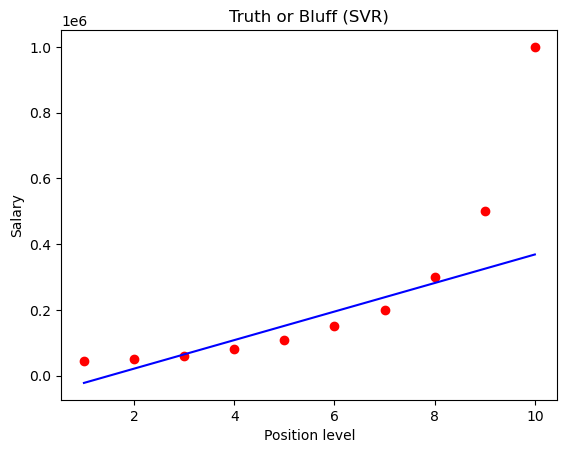

In [12]:
y_pred_tr = regressor.predict(X)
y_pred = sc_y.inverse_transform(y_pred_tr.reshape(-1, 1))
X_before = sc_X.inverse_transform(X.reshape(1, -1))
y_before = sc_y.inverse_transform(y.reshape(-1, 1))

plt.scatter(X_before.flatten(), y_before.flatten(), color='red')
plt.plot(X_before.flatten(), y_pred.flatten(), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()